__Exercise 1__

Repeat the previous numerical calculations for the matrix corresponding to the 1D Anderson model for several values of the disorder interval $W$ (assume $t=1$).

Realizado por: Mohamed Haddadi nº107193

#### Codigo

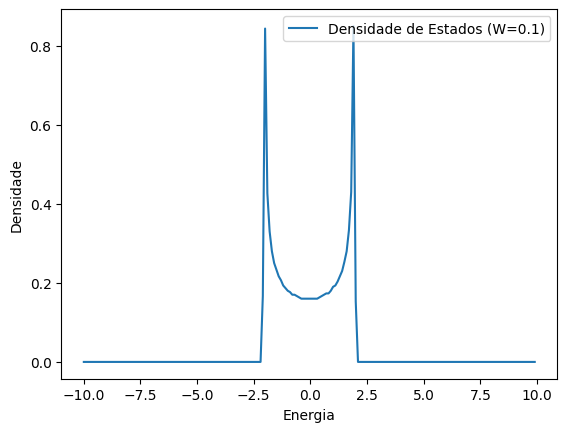

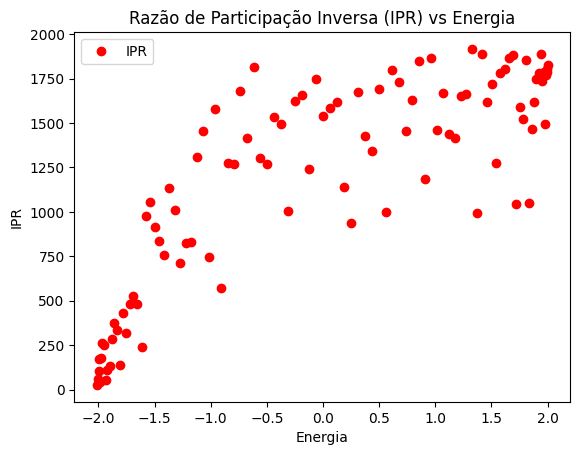

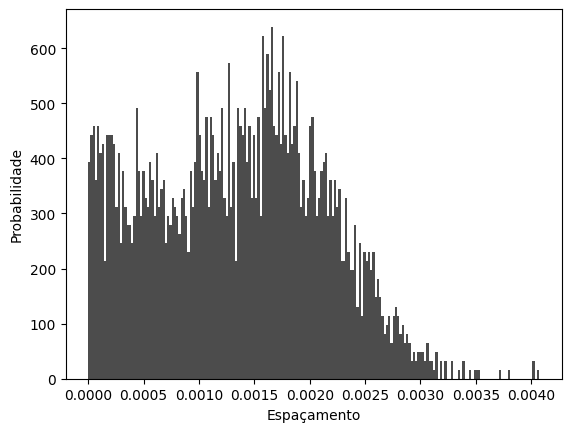

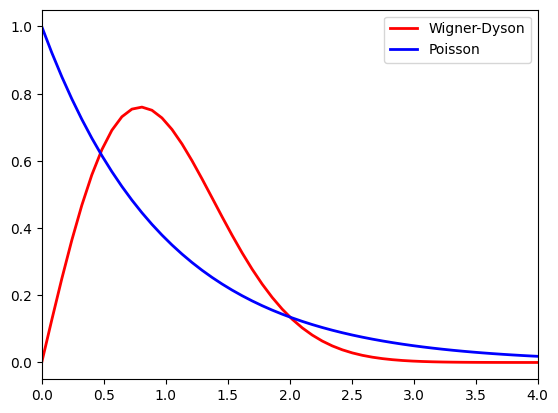

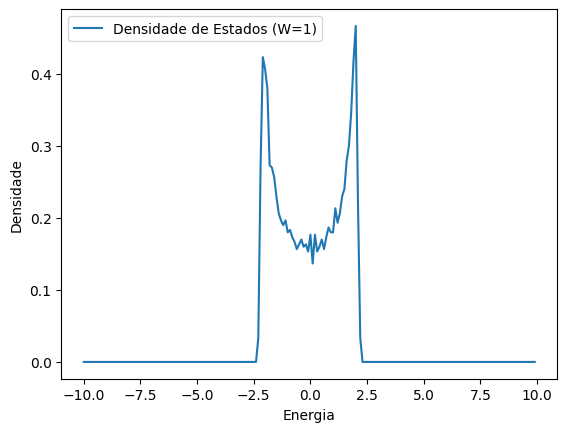

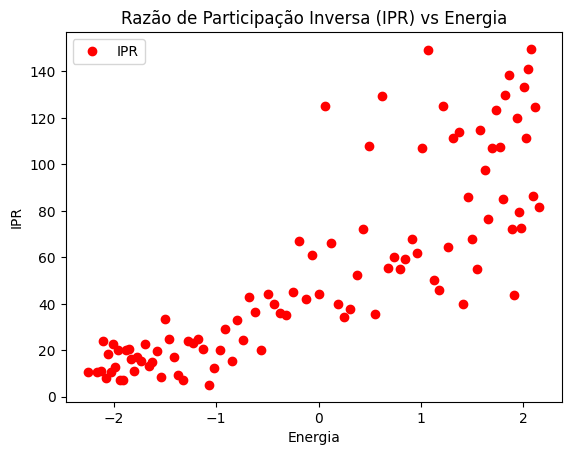

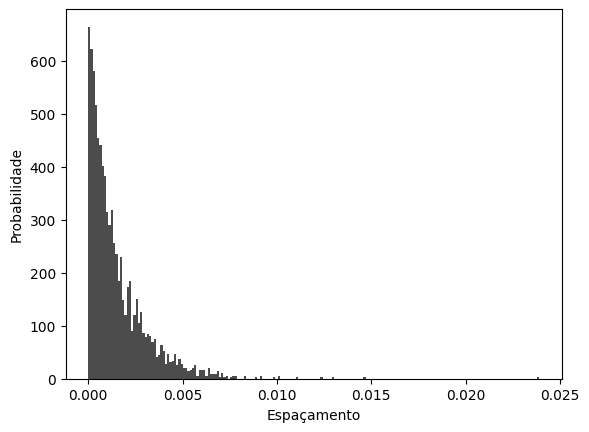

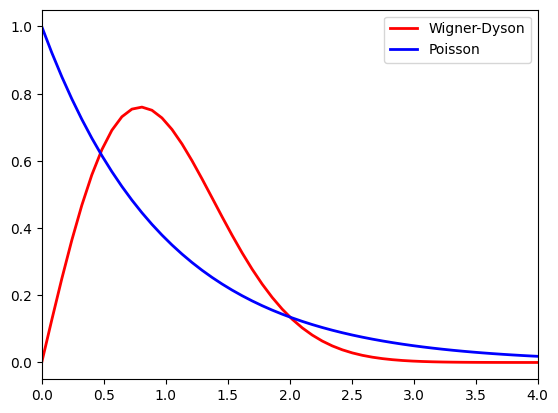

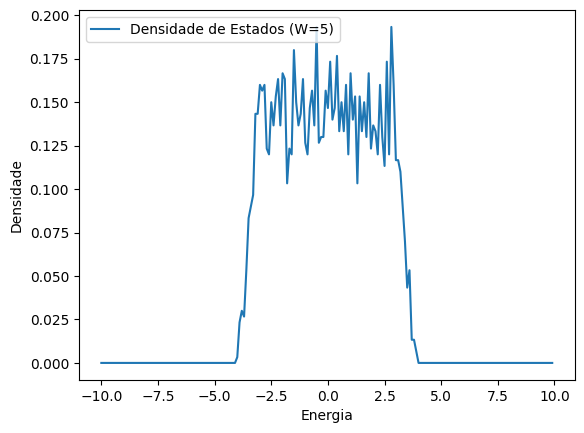

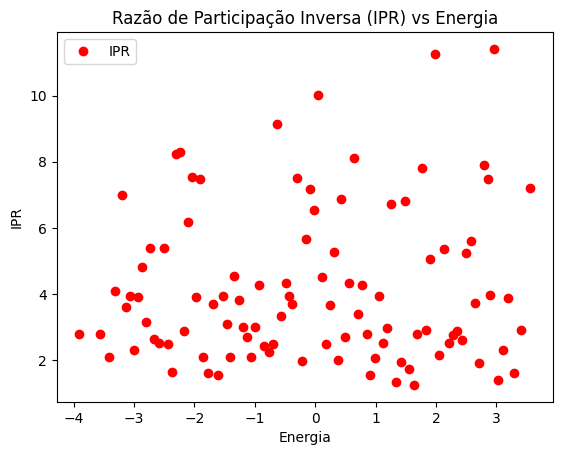

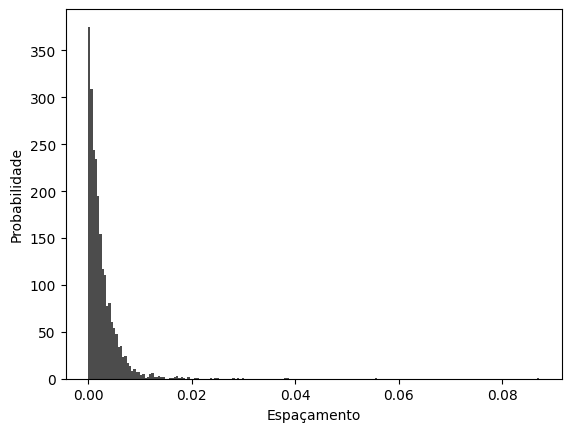

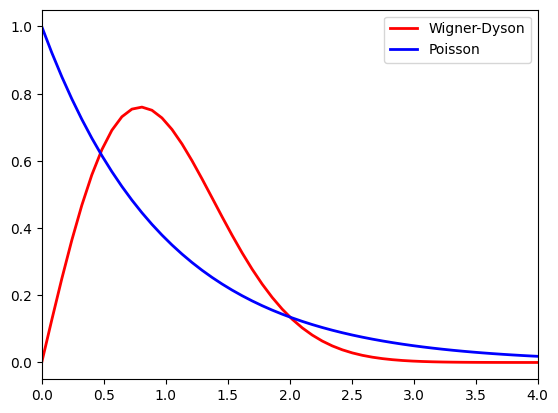

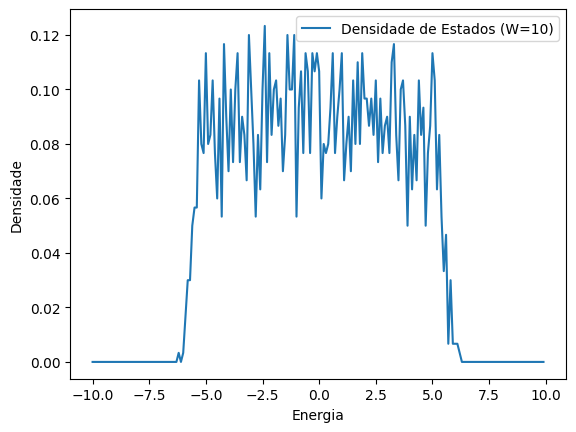

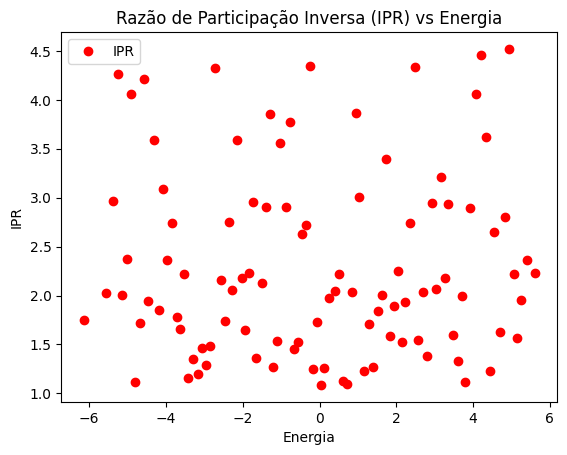

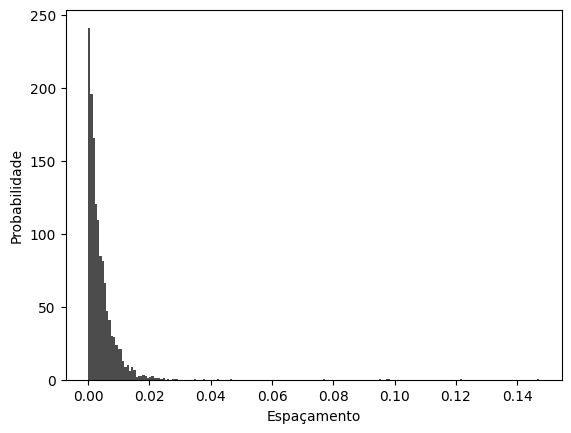

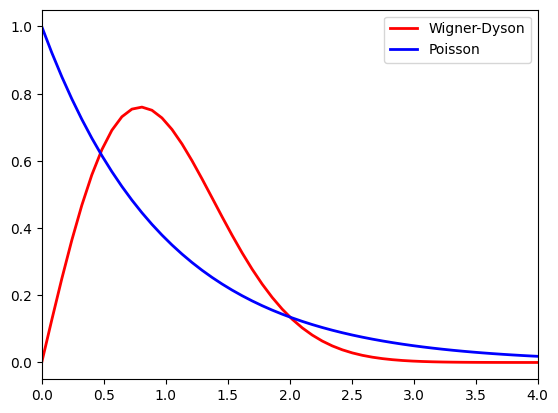

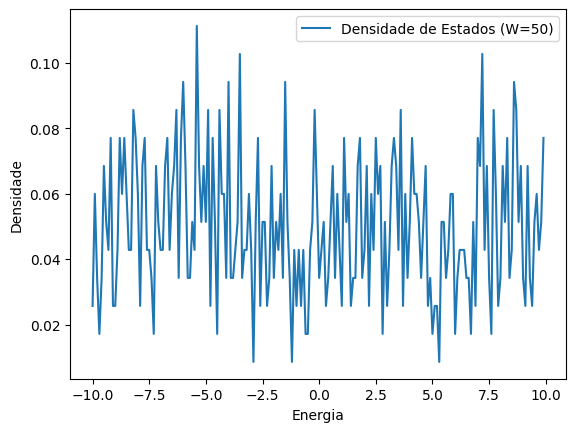

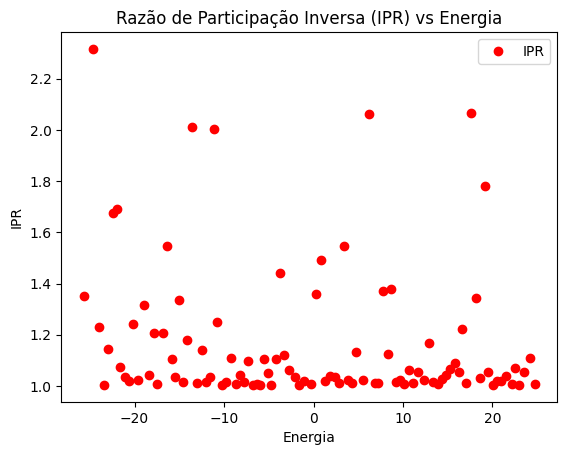

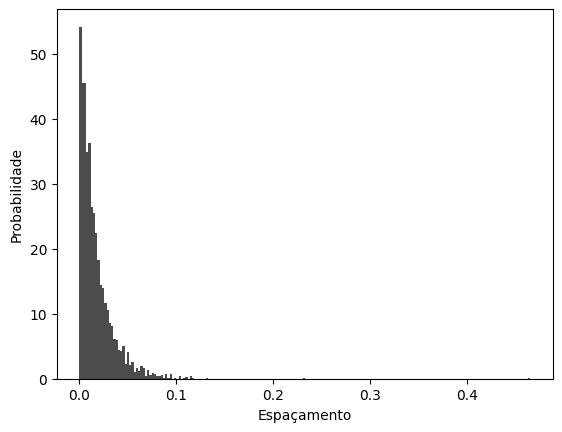

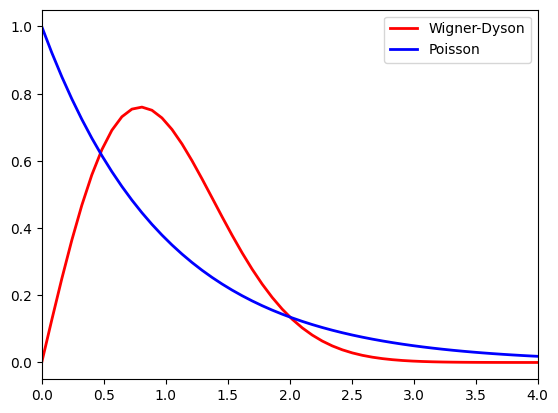

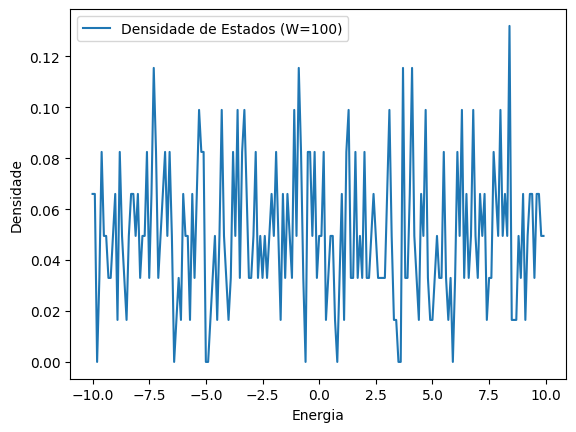

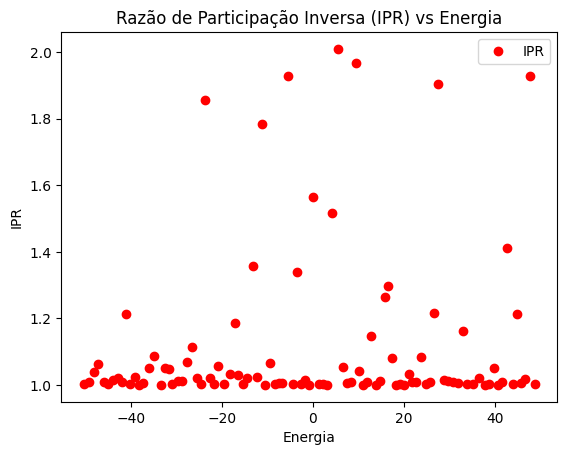

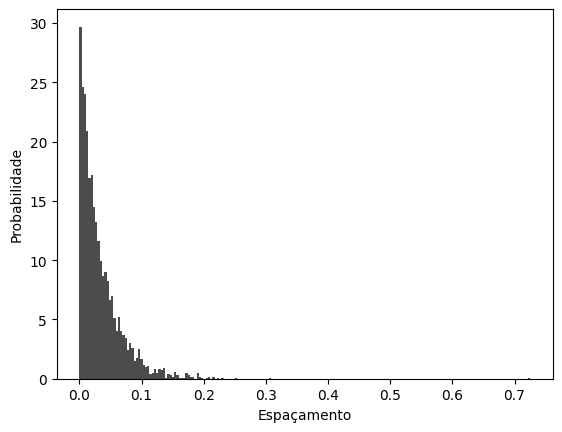

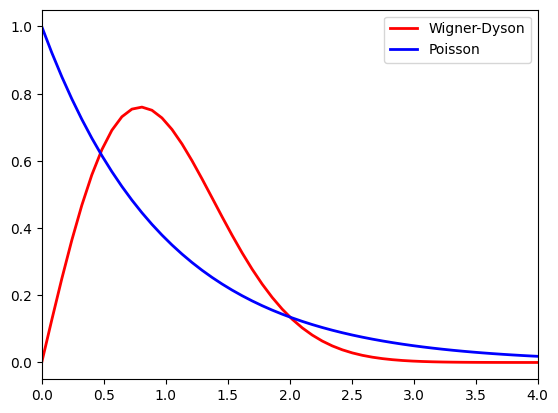

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""Gera a matriz Hamiltoniana para o modelo de Anderson 1D."""
def generate_anderson_matrix(N, W):
    # Geramos energias aleatórias nos sítios
    w_n = np.random.uniform(-W/2, W/2, size=N)
    # Constroimos a matriz Hamiltoniana
    H = np.diag(w_n) + np.diag(np.ones(N-1), k=1) + np.diag(np.ones(N-1), k=-1)
    return H

"""Calcula os valores proprios da matriz Hamiltoniana."""
def calculate_eigenvalues_anderson(H):
    eigenvalues = np.linalg.eigvalsh(H)
    return eigenvalues

"""Calcula a densidade de estados."""
def calculate_density_of_states(eigenvalues, Emin, Emax, num_bins):
    dos, bins = np.histogram(eigenvalues, bins=num_bins, range=(Emin, Emax), density=True)
    return dos, bins

"""Calcula os espaçamentos entre os níveis."""
def calculate_level_spacings(eigenvalues):
    eigenvalues_sorted = np.sort(eigenvalues)
    spacings = np.diff(eigenvalues_sorted) # Fazmos a differença entre energias
    return spacings
"""Calcula o espaçamento teórico entre níveis baseado na distribuição de Wigner-Dyson ou Poisson."""
def theoretical_level_spacing(s):
    wigner_dyson = np.pi / 2 * s * np.exp(- np.pi * s**2 / 4)
    poisson = np.exp(-s)
    return wigner_dyson, poisson

# Parâmetros
N = 3000  # Tamanho do H
W_values = [0.1, 1,5, 10,50,100]  # valore de desordem
Emin = -10  # Energia mínima para o gráfico de densidade de estados
Emax = 10  # Energia máxima 
num_bins_dos = 200  # Número de bins para o histograma de densidade de estados
num_bins_spacing = 200  # " espaçamento entre níveis
skip = 30  # Pulo para o cálculo do IPR

# Realizamos os cálculos para cada valor de desordem
for W in W_values:
    # Geramos a matriz de Anderson
    H = generate_anderson_matrix(N, W)
    
    # Calculamos os valores proprios e a densidade de estados
    eigenvalues = calculate_eigenvalues_anderson(H)
    dos, bins = calculate_density_of_states(eigenvalues, Emin, Emax, num_bins_dos)
    
    # Plotamos a densidade de estados
    plt.figure()
    plt.plot(bins[:-1], dos, label=f'Densidade de Estados (W={W})')
    plt.xlabel('Energia')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()
    
    # Calculamos o IPR
    eigenvectors = np.linalg.eig(H)[1]
    ipr_values = 1 / np.sum(np.abs(eigenvectors)**4, axis=0)
    
    # Plotamos o IPR vs energia
    plt.figure()
    plt.plot(eigenvalues[::skip], ipr_values[::skip], 'ro', label='IPR')
    plt.xlabel('Energia')
    plt.ylabel('IPR')
    plt.title('Razão de Participação Inversa (IPR) vs Energia')
    plt.legend()
    plt.show()
    
    # Calculamos os espaçamentos entre níveis
    spacings = calculate_level_spacings(eigenvalues)
    
    # Plotamos o histograma dos espaçamentos entre níveis
    plt.figure()
    hist, bins, _ = plt.hist(spacings, bins=num_bins_spacing, density=True, color='black', alpha=0.7, label='Espaçamentos entre Níveis')
    plt.xlabel('Espaçamento')
    plt.ylabel('Probabilidade')
    plt.figure()
    
    # Plotamos as curvas teóricas
    s_values = np.linspace(0, 8, 100)
    wigner_dyson, poisson = theoretical_level_spacing(s_values)
    plt.plot(s_values, wigner_dyson, color='red', linewidth=2, label='Wigner-Dyson')
    plt.plot(s_values, poisson, color='blue', linewidth=2, label='Poisson')
    plt.xlim(0, 4)
    plt.legend()
    plt.show()


#### Análise dos resultados

Densidade de Estados :

Com o aumento do intervalo de desordem (W), a densidade de estados pode variar, o que mostra como a desordem afeta a distribuição das energias permitidas no sistema.
Podemos observar que a largura da densidade de estados aumenta à medida que W aumenta, isto indica que desordem leva a uma maior dispersão das energias permitidas no sistema. Isso significa que há uma variedade maior de estados disponíveis em diferentes energias e essa maior dispersão pode ser atribuída ao efeito da desordem na estrutura do sistema. A desordem introduz variações nos potenciais dos sítios, o que leva a uma ampla gama de energias permitidas para os eletrões no material. Consequentemente, a densidade de estados se alarga, refletindo a variedade de energias disponíveis para os eletrões.

Razão de Participação Inversa (IPR) vs Energia:

O IPR é uma medida da localização espacial dos estados. Valores menores de IPR indicam estados mais localizados, enquanto valores maiores indicam estados mais delocalizados.

- Para W pequeno, o sistema está próximo do regime de condutância metálica, onde os eletrões podem se mover livremente através do material. Nesse caso, os estados eletrónicos tendem a ser mais delocalizados, e o IPR será maior, indicando uma distribuição mais uniforme dos estados como pode ser observado nos gráficos com W pequeno.


- Para W grande, o sistema vai estar mais no regime de isolamento, onde a desordem é mais forte e os eletrões ficam mais confinados em regiões localizadas do material. Neste caso, os estados eletrónicos tendem a ser mais localizados, e o IPR  é menor, o que indica uma concentração maior dos estados em regiões específicas, estando de acordo com os gráficos com W grande.


Histograma dos Espaçamentos entre Níveis:

- Para valores pequenos de W, onde os estados são mais extensos e têm maior sobreposição, os espaçamentos entre os níveis seguem uma distribuição semelhante à de Wigner-Dyson (mostrada no gráfico das curvas teóricas) como visto nos histogramas, caracterizada pela repulsão entre os níveis. Isso é consistente com a estatística GOE.


- Por outro lado, para valores grandes de W, onde os estados são mais localizados e têm menor sobreposição, os espaçamentos entre os níveis seguirão uma distribuição quase de Poisson, onde os níveis são independentes um do outro, estando de acordo com os histogramas. Isso é observado quando a desordem domina sobre a cinética, resultando em estados altamente localizados, e é consistente com a teoria de que para estados altamente localizados, os espaçamentos entre os níveis se aproximam de uma distribuição de Poisson.